In [88]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import seaborn as sns
import datetime as dt
sns.set()

In [105]:
color_y ='#ffab00'
color_r = '#C61437'
color_b = '#3F33FF'
redye = ['#C61437','#ffab00', '#3F33FF']

# Hypothesis

- **Its is more likely to have delay time in Spain airports than in the rest of europe. (1)**


- **The Barcelona airport is the airport with less delays time in average of Spain. (2)**


- **Vueling is the air carrier with more delays on average (3)**


- **The average delay time is Spain is longer than in Germany. (4)**


- **If the flight is delay before departure it is more likely that the overall delay increases (5)**


Legacy carriers flights are less likely to be delay than low cost carriers flights.



### Importing the data from Localhost

In [89]:
driver = 'mysql+pymysql:'
user = 'root'
password = '19693903'
ip = '127.0.0.1'
database = 'project_4'

In [90]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [91]:
query = """
SELECT *
FROM flights
"""

In [92]:
query2 = """
SELECT * FROM airports
"""

In [93]:
airports_info = pd.read_sql(query2, engine)

In [94]:
flights = pd.read_sql(query, engine)

In [95]:
data = flights.merge(airports_info, left_on = 'depart_airpt', right_on='iata_code')

In [96]:
data = data.drop(columns = ('iata_code'), axis = 1).rename(columns = {'country_code':'depart_country'})

In [97]:
data = data.astype({'depart_delay': int,'arri_delay':int})

In [98]:
data['Total_delay'] = data['depart_delay'] + data['arri_delay']

In [99]:
data.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay,depart_country,name,Total_delay
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0,ES,Lanzarote,0
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0,ES,Lanzarote,0
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0,ES,Lanzarote,0
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0,ES,Lanzarote,0
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0,ES,Lanzarote,0


## Descriptive stats from Spain 

In [100]:
## Filtering the data to obtain only Spain observations

data_es = data[data['depart_country'] == 'ES']

In [101]:
data_es.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay,depart_country,name,Total_delay
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0,ES,Lanzarote,0
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0,ES,Lanzarote,0
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0,ES,Lanzarote,0
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0,ES,Lanzarote,0
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0,ES,Lanzarote,0


### Distributions and summary statistics

#### Distribution of departure and arrival delays

In [102]:
es_delays =  data_es[np.logical_and(data_es['depart_delay']>0, data_es['arri_delay']>0)]

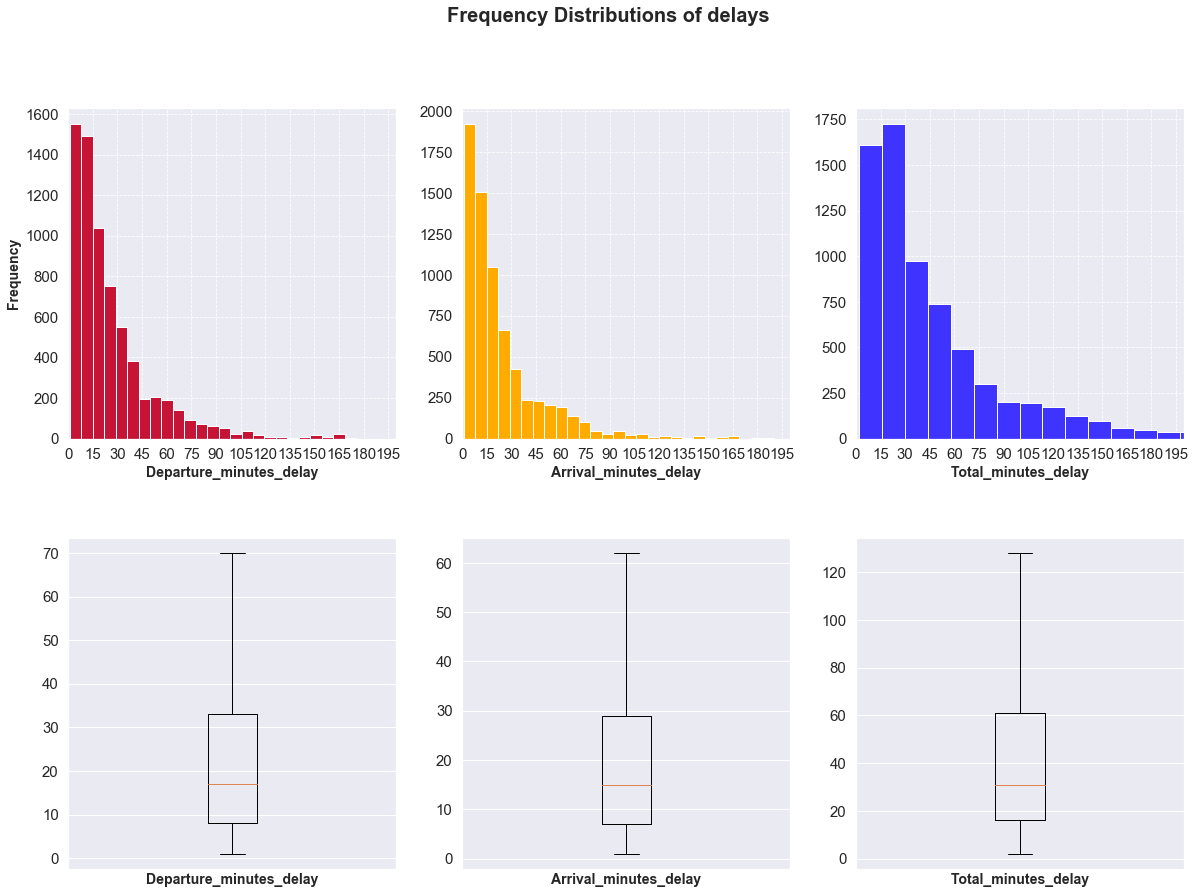

In [109]:
fig, [ax1, ax2] = plt.subplots(2,3, figsize=[20,14])
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Frequency Distributions of delays', fontweight = 900, fontsize = 20)

ax1[0].hist(es_delays.depart_delay,bins=40, color=color_r)
ax1[0].set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1[0].grid(linestyle='--', linewidth=0.8)
ax1[0].set_xlim([0, 200])
ax1[0].tick_params(axis="x", labelsize=15)
ax1[0].tick_params(axis="y", labelsize=15)
ax1[0].set_xticks(np.arange(0, 200,15))

ax1[1].hist(es_delays.arri_delay, bins=40, color=color_y)
ax1[1].set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax1[1].grid(linestyle='--', linewidth=0.8)
ax1[1].set_xlim([0, 200])
ax1[1].tick_params(axis="x", labelsize=15)
ax1[1].tick_params(axis="y", labelsize=15)
ax1[1].set_xticks(np.arange(0, 200,15))

ax1[2].hist(es_delays.Total_delay, bins=40, color=color_b)
ax1[2].set_xlabel('Total_minutes_delay',fontweight = 900, fontsize = 14)
ax1[2].grid(linestyle='--', linewidth=0.8)
ax1[2].set_xlim([0, 200])
ax1[2].tick_params(axis="x", labelsize=15)
ax1[2].tick_params(axis="y", labelsize=15)
ax1[2].set_xticks(np.arange(0, 200,15))

ax2[0].boxplot(es_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[0].set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax2[0].set_xticks([])
ax2[0].tick_params(axis="x", labelsize=15)
ax2[0].tick_params(axis="y", labelsize=15)

ax2[1].boxplot(es_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[1].set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2[1].set_xticks([])
ax2[1].tick_params(axis="x", labelsize=15)
ax2[1].tick_params(axis="y", labelsize=15)

ax2[2].boxplot(es_delays.Total_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[2].set_xlabel('Total_minutes_delay',fontweight = 900, fontsize = 14)
ax2[2].set_xticks([])
ax2[2].tick_params(axis="x", labelsize=15)
ax2[2].tick_params(axis="y", labelsize=15)

plt.show()

In [110]:
es_delays.describe()

,depart_delay,arri_delay,Total_delay
count,6942.000000,6942.000000,6942.000000
mean,25.539902,23.443532,48.983434
std,27.028105,26.482015,52.558318
min,1.000000,1.000000,2.000000
25%,8.000000,7.000000,16.000000
50%,17.000000,15.000000,31.000000
75%,33.000000,29.000000,61.000000
max,280.000000,281.000000,560.000000


In [111]:
es_dep_delay_mean = es_delays.depart_delay.mean()
es_dep_delay_std = es_delays.depart_delay.std()
es_dep_delay_var = es_delays.depart_delay.var()

es_arrv_delay_mean = es_delays.arri_delay.mean()
es_arrv_delay_std = es_delays.arri_delay.std()
es_arrv_delay_var = es_delays.arri_delay.var()

es_total_delay_mean = es_delays.Total_delay.mean()
es_total_delay_std = es_delays.Total_delay.std()
es_total_delay_var = es_delays.Total_delay.var()

### Distributions of flights during the day

In [112]:
depart_hours = data_es['schd_depart_time'].dt.hour
arri_hours = data_es['schd_arri_time'].dt.hour

df_hours_es = pd.DataFrame([depart_hours, arri_hours])
df_hours_es = df_hours_es.transpose()

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


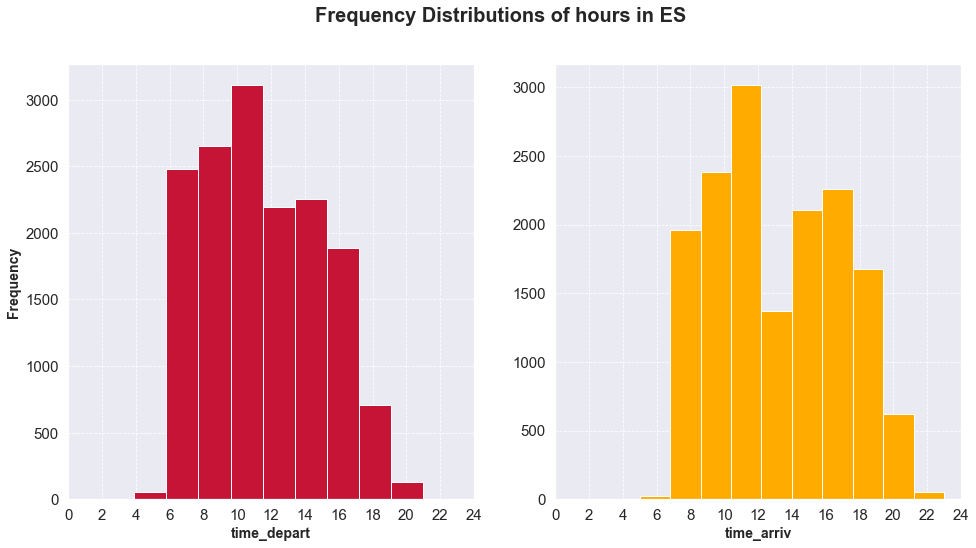

In [113]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of hours in ES', fontweight = 900, fontsize = 20)

ax1.hist(depart_hours, color=color_r)
ax1.set_xlabel('time_depart',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xticks(np.arange(0, 26,2))
ax1.tick_params(axis="y", labelsize=15)
ax1.tick_params(axis="x", labelsize=15)

ax2.hist(arri_hours,color=color_y)
ax2.set_xlabel('time_arriv',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xticks(np.arange(0, 26,2))
ax2.tick_params(axis="y", labelsize=15)
ax2.tick_params(axis="x", labelsize=15)
plt.show()

### Airlines flights distributions in ES

In [114]:
reds = ['#c70000','#b30000','#9f0000','#770000','#630000','#4f0000','#3b0000','#270000','#130000']


#8b0000
#770000
#630000
#4f0000
#3b0000
#270000
#130000
#000000


In [115]:
es_airlines = data_es.groupby('airln_name').count()

In [116]:
es_airlines = es_airlines.sort_values(by=['airln_code'],ascending=False).drop(es_airlines.iloc[:,1:], axis=1).\
rename(columns = {'airln_code':'total_count'}).reset_index(drop=False)


In [117]:
es_airlines = es_airlines[es_airlines['total_count']>300]

In [118]:
es_airlines['per'] = es_airlines['total_count'] / es_airlines['total_count'].sum()

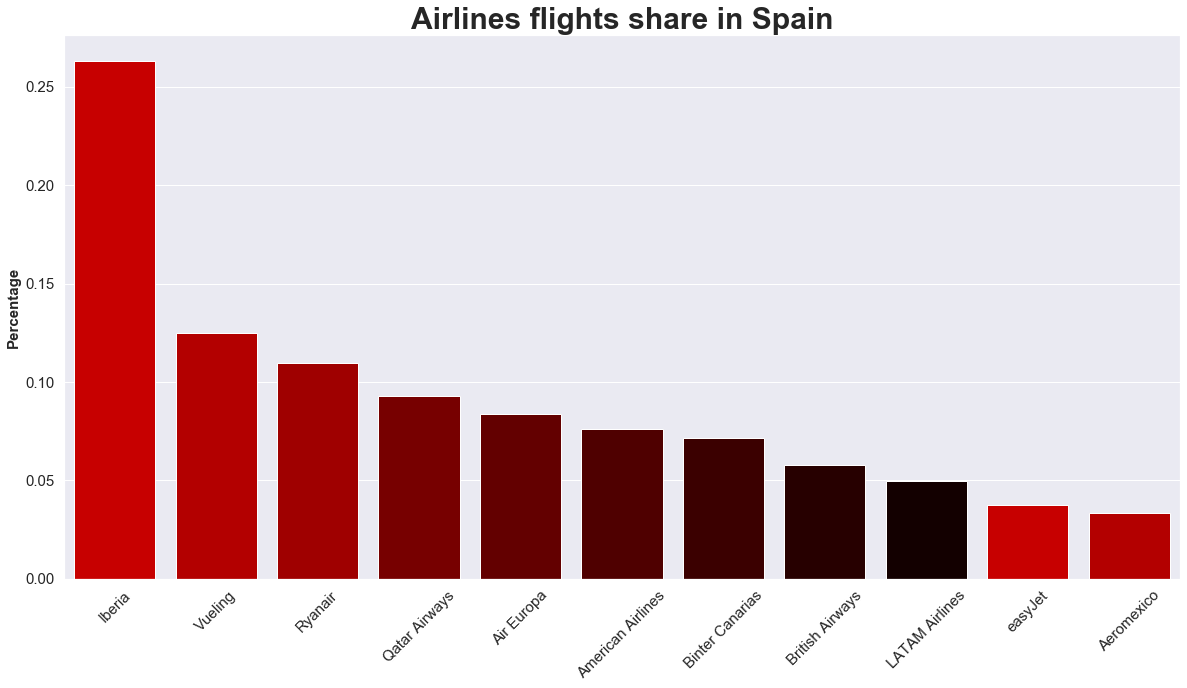

<Figure size 864x864 with 0 Axes>

In [119]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1 = sns.barplot(es_airlines.airln_name, es_airlines.per, palette=(reds), saturation=1)
plt.title("Airlines flights share in Spain",  fontweight = 900, fontsize = 30)
plt.ylabel('Percentage',  fontweight = 900, fontsize = 15)
plt.xlabel(None)

plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.figure(figsize=(12,12))

sns.set_context("poster")

## Delays by weekday

In [120]:
import datetime as dt

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data_es['weekday'] = data_es['schd_depart_time'].dt.dayofweek.map(dayOfWeek)

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [122]:
es_delay_day = data_es.groupby('weekday').mean().reset_index(drop=False)

In [123]:
tidy = es_delay_day.melt(id_vars='weekday').rename(columns=str.title)
tidy.columns = ['Weekday', 'Type', 'Mean delay time']

In [124]:
weekday_delays = data_es[['weekday', 'depart_delay', 'arri_delay','Total_delay']]
weekday_delays = weekday_delays[np.logical_and(weekday_delays['depart_delay']>0, weekday_delays['arri_delay']>0)]

In [125]:
tidy_2 = weekday_delays.melt(id_vars='weekday').rename(columns=str.title)
tidy_2.columns = ['Weekday', 'Type', 'Delay in minutes']

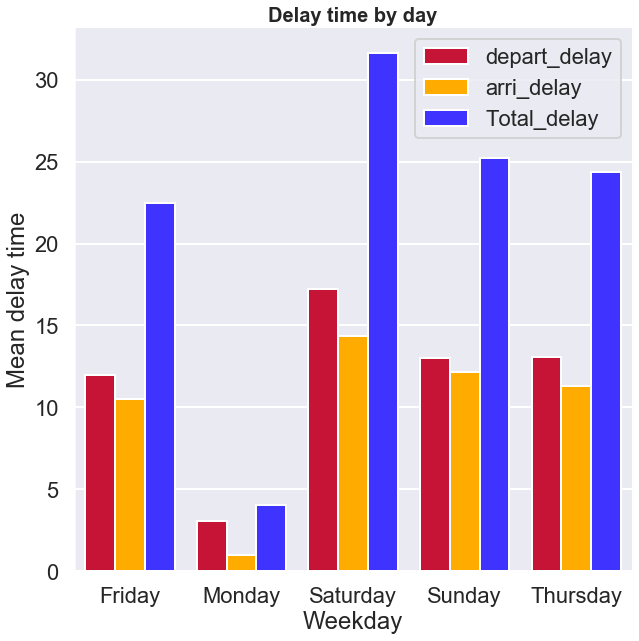

In [126]:
fig, ax1 = plt.subplots(figsize=(10,10))

sns.barplot(x='Weekday', y='Mean delay time', hue='Type', data=tidy, ax=ax1, palette=redye, saturation=1)
plt.title('Delay time by day',fontweight = 900, fontsize = 20)
plt.legend()
sns.despine(fig)

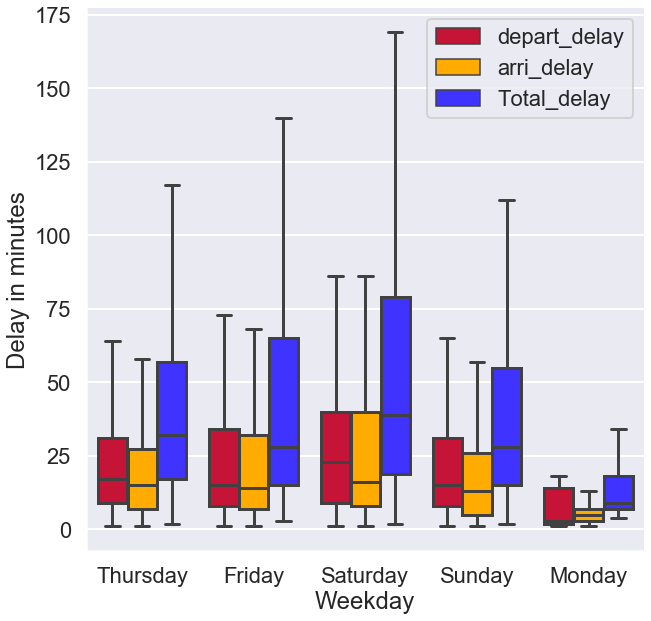

In [127]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='Weekday', y='Delay in minutes', hue='Type',ax=ax1,
                 data=tidy_2, palette=redye,showfliers=False, saturation = 1)

ax.legend()
sns.despine(fig)
plt.show()

## Relation between minutes of delay and day time

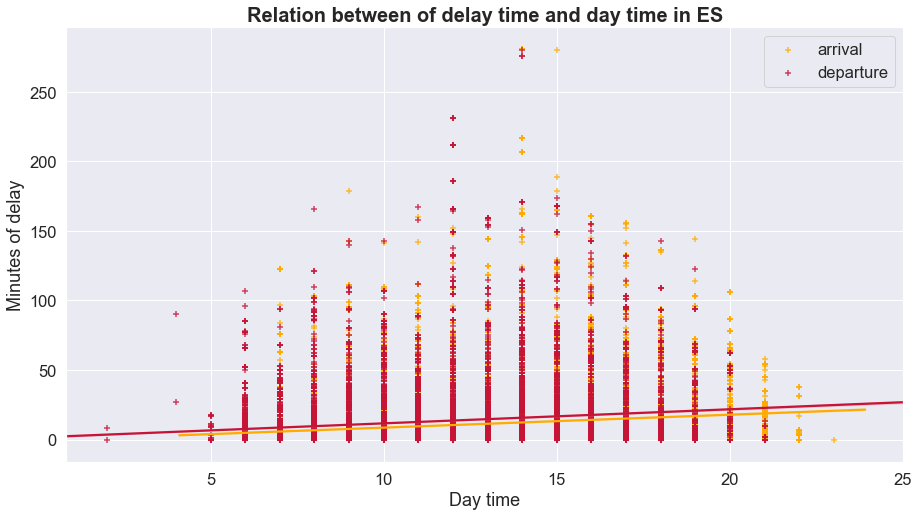

In [128]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15,8))
ax1 = sns.regplot(arri_hours, data_es.arri_delay, fit_reg=True, color=color_y,marker="+", label='arrival')
ax2 =sns.regplot(depart_hours, data_es.depart_delay, fit_reg=True, color=color_r, marker="+", label='departure')
ax1.set(ylabel='Minutes of delay', xlabel='Day time')
plt.title('Relation between of delay time and day time in ES',fontweight = 900, fontsize = 20)
ax.legend()
plt.show()

### Relation between delay in departures and total delay

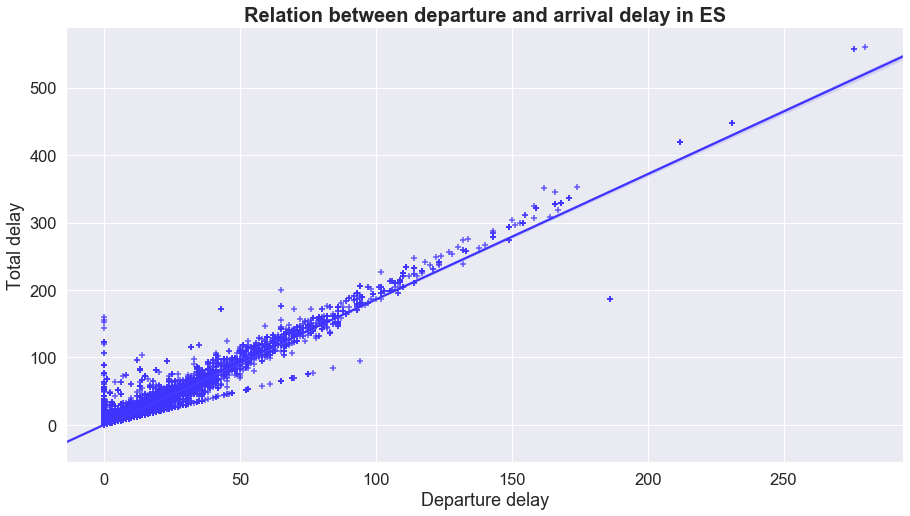

In [129]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15,8))
ax1 =sns.regplot(data_es.depart_delay, data_es.Total_delay, fit_reg=True, color=color_b, marker="+")
ax1.set(ylabel='Total delay', xlabel='Departure delay')
plt.title('Relation between departure and arrival delay in ES',fontweight = 900, fontsize = 20)
plt.show()

### Delay time for the airlines with more flights


In [130]:
query2 = '''
SELECT airln_name, AVG(depart_delay) AS mean_depart_delay, AVG(arri_delay) AS mean_arriv_delay
FROM flights
WHERE airln_name IN ('Iberia', 'Vueling', 'Ryanair', 'Qatar Airways', 'Air Europe', 'Binter Canarias')
GROUP BY airln_name
ORDER BY mean_depart_delay DESC

'''

In [131]:
es_airlines_delays_top = pd.read_sql(query2, engine)

In [132]:
es_airlines_delays_top['Total_mean_delay'] = es_airlines_delays_top['mean_depart_delay'] + \
                        es_airlines_delays_top['mean_arriv_delay']


In [133]:
tidy_4 = es_airlines_delays_top.melt(id_vars='airln_name').rename(columns=str.title)

In [134]:
#Worst airlines in Spain filter by delays

es_airlines_delays = data.groupby('airln_name').mean().reset_index(drop=False)
es_airlines_delays_worst = es_airlines_delays[np.logical_and(es_airlines_delays['depart_delay']>30, \
                                                       es_airlines_delays['arri_delay']>30)]

es_airlines_delays_worst = es_airlines_delays_worst.sort_values(by='depart_delay', ascending=False)
tidy_3 = es_airlines_delays_worst.melt(id_vars='airln_name').rename(columns=str.title)


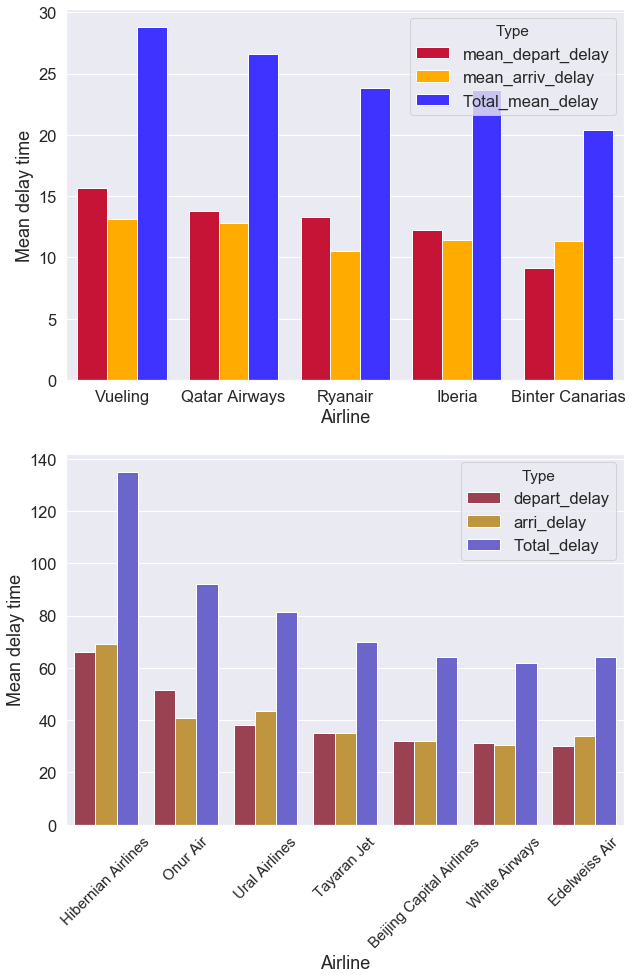

In [135]:
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(10,15))
fig.subplots_adjust(hspace=0.2)

tidy_4.columns = ['Airline', 'Type', 'Mean delay time']
tidy_3.columns = ['Airline', 'Type', 'Mean delay time']
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_4, ax=ax1, palette=redye, saturation=1)
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_3, ax=ax2, palette=redye, saturation=0.5)
plt.xticks(fontsize = 15, rotation=45)
plt.show()